###### 161227-2330-06@kaben: notes below follow along with *[Python for Finance: Analyze Big Financial Data](https://www.amazon.com/Python-Finance-Analyze-Financial-Data/dp/1491945281)*.
###### 151228-2230-06@kaben: potential resources and further reading:
* Chapter 1:
 * Fletcher and Gardener (2009), *Financial Modeling in Python*
 * Hilpisch (2015): *Derivatives Analytics with Python*, http://derivatives-analytics-with-python.com
 * Crosman (2013): "Top 8 Ways Banks Will Spend Their 2014 IT Budgets", *Bank Technology News*
 * Deutsche Börse Group (2008), "The Global Derivatives Market — An Introduction", white paper
 Ding (2010), "Optimizing the OTC Pricing and Valuation Infrastructure", *Celent study*
 * Lewis (2014), *Flash Boys*
 * Patterson (2010), *The Quants*
 * Master of Financial Engineering Program at Baruch College of the City University of New York, http://mfe.baruch.cuny.edu
* Chapter 2:
 * McKinney (2012), *Python for Data Analysis*
 * Python Quant Platform, The Python Quants GmbH, http://quant-platform.com
* Chapter 3:
 * Black, Fischer and Myron Scholes (1973), “The Pricing of Options and Corporate Liabilities”, *Journal of Political Economy,* Vol. 81, No. 3, pp. 638-659
 * Hilpisch, Yves (2013), “Efficient Data and Financial Analytics with Python”, *Software Developer’s Journal*, No. 13, pp. 56-65.
 * Merton, Robert (1973), “Theory of Rational Option Pricing”, *Bell*
 * Eurex (2013), "VSTOXX Advanced Services"

## Notes during Chapter 1: Why Python for Finance?

*The Zen of Python:*

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb

In [4]:
%timeit data.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2014')

The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 446 ms per loop


###### 161228-2003-06@kaben: below is alternate syntax using datetime.datetime(...).
###### 161228-2012-06@kaben: Idiom demonstrated: dowloading daily price data.

In [5]:
import datetime
goog = data.DataReader('GOOG', data_source='google', start=datetime.datetime(2009,3,14), end=datetime.datetime(2016,12,28))
goog.tail()

Open    High     Low   Close     Volume
Date                                                 
2016-12-20  796.76  798.65  793.27  796.42   951014.0
2016-12-21  795.84  796.68  787.10  794.56  1211346.0
2016-12-22  792.36  793.32  788.58  791.26   972169.0
2016-12-23  790.90  792.74  787.28  789.91   623944.0
2016-12-27  790.68  797.86  787.66  791.55   789321.0

###### 161228-1956-06@kaben: Pandas warns that `rolling_std`  is deprecated. Below are both the deprecated and current idioms.
###### 161228-2011-06@kaben: Idioms demonstrated:
* Computing log of return.
* Computing volatility.

In [6]:
%timeit goog['Log_Ret'] = np.log(goog['Close']/goog['Close'].shift(1))

The slowest run took 88.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 409 µs per loop


In [7]:
%timeit goog['Volatility'] = pd.rolling_std(goog['Log_Ret'], window=252)*np.sqrt(252)

/Users/kaben/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:257: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()


The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 550 µs per loop


In [8]:
%timeit goog['Volatility'] = goog['Log_Ret'].rolling(window=252).std()*np.sqrt(252)

1000 loops, best of 3: 525 µs per loop


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112e75908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112e3a5f8>], dtype=object)

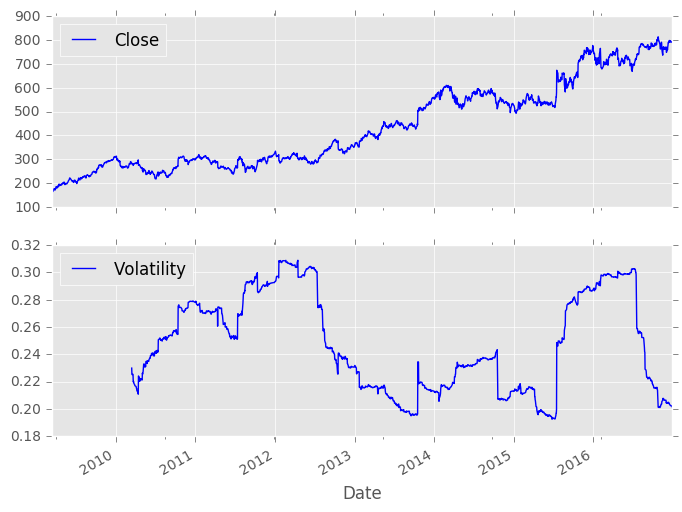

In [9]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))

## Notes during Chapter 2: Infrastructure and Tools

###### 161228-2109-06@kaben: Below are some example Anaconda commands.

In [11]:
!conda info

Current conda install:

               platform : osx-64
          conda version : 4.2.13
       conda is private : False
      conda-env version : 4.2.13
    conda-build version : 2.0.12
         python version : 3.5.2.final.0
       requests version : 2.12.4
       root environment : /Users/kaben/anaconda  (writable)
    default environment : /Users/kaben/anaconda
       envs directories : /Users/kaben/anaconda/envs
          package cache : /Users/kaben/anaconda/pkgs
           channel URLs : https://repo.continuum.io/pkgs/free/osx-64
                          https://repo.continuum.io/pkgs/free/noarch
                          https://repo.continuum.io/pkgs/pro/osx-64
                          https://repo.continuum.io/pkgs/pro/noarch
            config file : None
           offline mode : False



In [12]:
!conda search pytables

Fetching package metadata .......
pytables                     2.4.0                np16py26_0  defaults        
                             2.4.0                np16py27_0  defaults        
                             2.4.0                np17py26_0  defaults        
                             2.4.0                np17py27_0  defaults        
                             3.0.0                np16py26_0  defaults        
                             3.0.0                np16py27_0  defaults        
                             3.0.0                np17py26_0  defaults        
                             3.0.0                np17py27_0  defaults        
                             3.0.0                np16py26_1  defaults        
                             3.0.0                np16py27_1  defaults        
                             3.0.0                np17py26_1  defaults        
                             3.0.0                np17py27_1  defaults        
                  

In [13]:
!conda list ^pyt

# packages in environment at /Users/kaben/anaconda:
#
pytables                  3.3.0               np111py35_0  
pytest                    3.0.5                    py35_0  
python                    3.5.2                         0  
python-dateutil           2.6.0                    py35_0  
python.app                1.2                      py35_4  
pytz                      2016.10                  py35_0  


In [14]:
!conda list "^p.*les$"

# packages in environment at /Users/kaben/anaconda:
#
pytables                  3.3.0               np111py35_0  


## Notes during Chapter 3: Introductory Examples
###### 161228-2222-06@kaben: some terms to learn:
* Implied volatilities
  * **Option strike:**
      * From Wikipedia (https://en.wikipedia.org/wiki/Strike_price):
        * **Underlying:** the asset (a.k.a "instrument" underlying the "derivate" contract (where the derivate contract *derives* its value from the performance of the underlying asset).
        * **Spot price:** the current market price of the underlying.
        * **Call option:** right but not obligation to buy given quantity of underyling security at strike price on a given date.
          * Has value at expiration when spot price $S$ is above strike price $K$. Specifically, value is given by $\max[(S-K), 0]$, also written as $(S-K)^+$.
          * For an underyling security with spot price of \$150, a \$100 call option is "worth" \$50. At spot price $S<=\$100$, call option is worthless.
        * **Put option:** right but not obligation to sell.
          * Has value at expiration when spot price $S$ is *below* strike price $K$, given by $(K-S)^+$.
          * At spot price of \$50, a \$100 put option is "worth" \$50. At spot price $S>=\$100$, put option is worthless.
        * **Maturity:** date on which a derivative instrument expires or becomes due for payment or settlement.

          * Upon maturity if the buyer of the call or put option contract chooses to exercise their right to buy or sell, respectively, the underyling, then the seller of the contract is obligated to sell or buy, respectively, the underyling at the agreed-upon strike price.
  * "...pricing European call options on and underlying without dividends..."
* Value-at-risk
* Credit value
